In [178]:
import pandas as pd
from wordcloud import WordCloud
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [179]:
"""
reviews dataframe has Review which is original review, review (lowercase) is lemmatized and checked for english
"""
reviews = pd.read_csv("Data/classifier_data.csv")
reviews.dropna(inplace=True)

In [180]:
train, test = train_test_split(reviews, test_size=0.30)
train.Real.value_counts()

0    45535
1    45417
Name: Real, dtype: int64

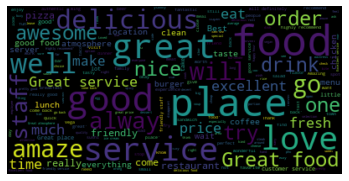

In [181]:
wordcloud = WordCloud(max_font_size=50).generate("".join(str(list(test.Review.values))))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [182]:
"""
Testing clustering
"""
vectorized_text = TfidfVectorizer(stop_words='english')
vec_reviews = vectorized_text.fit_transform(reviews['Review'].values)

In [190]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7).fit(vec_reviews)

In [191]:
kmeans_prediction_3 = model.predict(vec_reviews)
kmeans_prediction_3

array([0, 6, 0, ..., 0, 0, 2], dtype=int32)

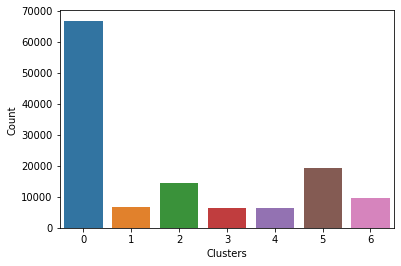

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
cp = sns.countplot(kmeans_prediction_3)
cp.set(xlabel='Clusters', ylabel='Count')
plt.show()

In [195]:
#source: https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py
def get_topn_features(n,no_of_cluster,model):
    ordered_centroids = model.cluster_centers_.argsort()[:,::-1]
    feature_names = vectorized_text.get_feature_names()
    for i in range(no_of_cluster):
        print("Cluster %d:" % i, end='')
        for indexes in ordered_centroids[i,:n]:
            print(' %s' % feature_names[indexes], end='')
        print()

get_topn_features(10,7,model)

Cluster 0: place food love service delicious great time like come just
Cluster 1: amaze food place service great love good definitely recommend delicious
Cluster 2: great food service place atmosphere love price delicious time good
Cluster 3: excellent service food great good place price recommend delicious definitely
Cluster 4: awesome great food service place love good atmosphere definitely amaze
Cluster 5: good food service place really price great nice pretty love
Cluster 6: friendly staff food great service good place super delicious love
